# figs_d25a.ipynb
Produce figures and analysis for manuscript.

Author: Benjamin S. Grandey.

In [1]:
import d25a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.2
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2025.1.1

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



Called fig_fusion_time_series(gmsl, None, None)
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Written fig01.pdf (0.02 MB)
Written fig01.png (0.24 MB)


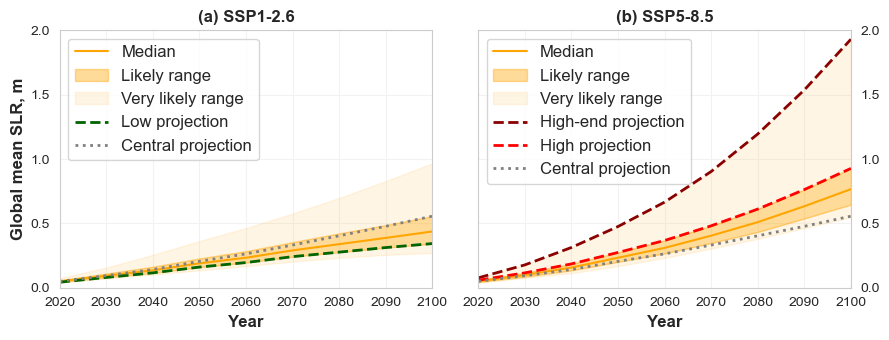

In [4]:
# Plot time series of GMSL
fig, axs = d25a.fig_fusion_time_series(slr_str='gmsl', gauges_str=None, loc_str=None)
_ = d25a.name_save_fig(fig, fso='f')

Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Written s01.pdf (0.02 MB)
Written s01.png (0.09 MB)


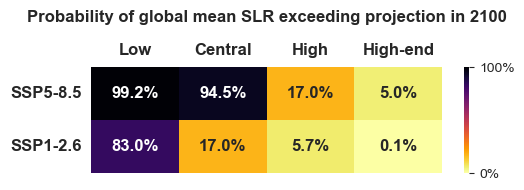

In [5]:
# Heatmap table showing probability of GMSL exceeding the low-end, central, and high-end projections in 2100
fig, ax = d25a.fig_p_exceed_heatmap()
_ = d25a.name_save_fig(fig, fso='s')

In [6]:
# Get year-2100 projections of relative SLR at gauges and show summary statistics
year_2100_df = d25a.read_year_2100_df(slr_str='rsl', gauges_str='gauges', cities_str=None)
year_2100_df.describe()

Reading year_2100/rsl_gauges_2100_d25a.csv


,location,lat,lon,gauge_id,low,central,high,high-end
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,936.447835,30.538543,29.344902,936.447835,0.267362,0.536211,0.966575,1.947510
std,616.930264,30.716980,94.763899,616.930264,0.281017,0.282148,0.304890,0.370791
min,1.000000,-65.250000,-179.370000,1.000000,-1.740000,-1.460000,-1.080000,-0.100000
25%,429.750000,16.830000,-57.980000,429.750000,0.210000,0.470000,0.880000,1.800000
50%,829.500000,36.960000,18.740000,829.500000,0.300000,0.570000,0.990000,2.000000
75%,1421.250000,52.965000,126.545000,1421.250000,0.370000,0.640000,1.090000,2.162500
max,2358.000000,80.620000,179.220000,2358.000000,2.080000,2.360000,2.840000,3.970000


In [7]:
# Table summarising some of the key relative SLR results across tide gauges
summary_df = d25a.get_year_2100_summary_df(slr_str='rsl', gauges_str='gauges', cities_str=None)
summary_df

Reading year_2100/rsl_gauges_2100_d25a.csv


,low,central,high,high-end
Median,0.3,0.6,1.0,2.0
IQR,0.2 to 0.4,0.5 to 0.6,0.9 to 1.1,1.8 to 2.2
Range,-1.7 to 2.1,-1.5 to 2.4,-1.1 to 2.8,-0.1 to 4.0
Count,1016,1016,1016,1016


In [8]:
# Table summarising some of the key relative SLR results results across cities
summary_df = d25a.get_year_2100_summary_df(slr_str='rsl', gauges_str='gauges', cities_str='cities')
summary_df

Reading year_2100/rsl_gauges_cities_2100_d25a.csv


,low,central,high,high-end
Median,0.3,0.6,1.0,2.0
IQR,0.3 to 0.4,0.5 to 0.7,0.9 to 1.1,1.9 to 2.2
Range,-0.2 to 1.8,0.0 to 2.0,0.5 to 2.4,1.3 to 3.4
Count,430,430,430,430


In [9]:
# Table summarising some of the key relative SLR results across megacities
summary_df = d25a.get_year_2100_summary_df(slr_str='rsl', gauges_str='gauges', cities_str='megacities')
summary_df

Reading year_2100/rsl_gauges_megacities_2100_d25a.csv


,low,central,high,high-end
Median,0.3,0.6,1.0,2.1
IQR,0.2 to 0.5,0.5 to 0.7,0.9 to 1.1,2.0 to 2.2
Range,-0.2 to 1.4,0.0 to 1.7,0.5 to 2.1,1.5 to 3.2
Count,33,33,33,33


In [10]:
# Table of relative SLR projections for megacities
mega_df = d25a.read_year_2100_df(slr_str='rsl', gauges_str='gauges', cities_str='megacities')
mega_df

Reading year_2100/rsl_gauges_megacities_2100_d25a.csv


,city_index,city_name,city_country,city_lat,city_lon,population_2025_1000s,coast_distance_km,city_short,location,gauge_id,gauge_name,gauge_distance_km,lat,lon,low,central,high,high-end
0,24,Buenos Aires,Argentina,-34.61,-58.40,15752,3,Buenos Aires,157,157,BUENOS_AIRES,3,-34.60,-58.37,0.30,0.52,0.90,1.85
1,59,Chittagong,Bangladesh,22.33,91.84,5653,6,Chittagong,1496,1496,CHARCHANGA,82,22.22,91.05,0.37,0.66,1.12,2.13
2,134,Rio de Janeiro,Brazil,-22.90,-43.21,13923,1,Rio de Janeiro,1032,1032,ILHA_FISCAL,4,-22.90,-43.17,0.32,0.57,0.97,2.03
3,236,Dalian,China,38.91,121.60,6347,2,Dalian,1513,1513,LAOHUTAN,8,38.87,121.68,0.29,0.55,1.01,2.06
4,251,Dongguan,China,23.02,113.74,7773,13,Dongguan,1366,1366,TSIM_BEI_TSUI,65,22.49,114.01,0.20,0.48,0.90,1.97
5,489,Tianjin,China,39.11,117.19,14704,46,Tianjin,1403,1403,TANGGU,48,39.00,117.72,0.18,0.50,1.00,2.01
6,610,Hong Kong,"China, Hong Kong SAR",22.28,114.19,7769,1,Hong Kong,1674,1674,QUARRY_BAY,2,22.29,114.21,0.26,0.56,0.99,2.06
7,681,Al-Iskandariyah (Alexandria),Egypt,31.19,29.90,5807,2,Alexandria,503,503,ALEXANDRIA,3,31.22,29.92,0.36,0.62,1.06,1.98
8,801,Chennai (Madras),India,13.05,80.25,12336,3,Chennai,205,205,CHENNAI,8,13.10,80.30,0.21,0.45,0.90,1.97
9,863,Kolkata (Calcutta),India,22.53,88.36,15845,42,Kolkata,48,48,KIDDERPORE,3,22.53,88.33,-0.21,0.04,0.46,1.47


Reading year_2100/rsl_gauges_2100_d25a.csv
Plotting projection for 1016 locations.
Written s02.pdf (0.08 MB)
Written s02.png (0.30 MB)


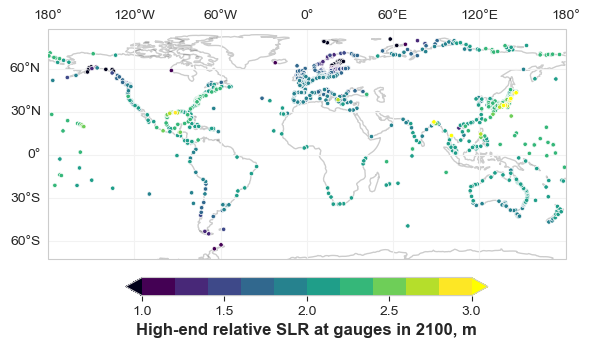

In [11]:
# Plot map showing high-end projection at all gauges
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='gauges', proj_str='high-end', vmin=1, vmax=3)
_ = d25a.name_save_fig(fig, fso='s')

In [12]:
# Plot map for cities in Asia - NO LONGER IMPLEMENTED
# fig, ax = d25a.fig_proj_2100_map(proj_col_str='rsl_high', gauges_cities_megacities='megacities', region='asia')
# _ = d25a.name_save_fig(fig, fso='f')

Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Written fig02.pdf (0.03 MB)
Written fig02.png (0.53 MB)


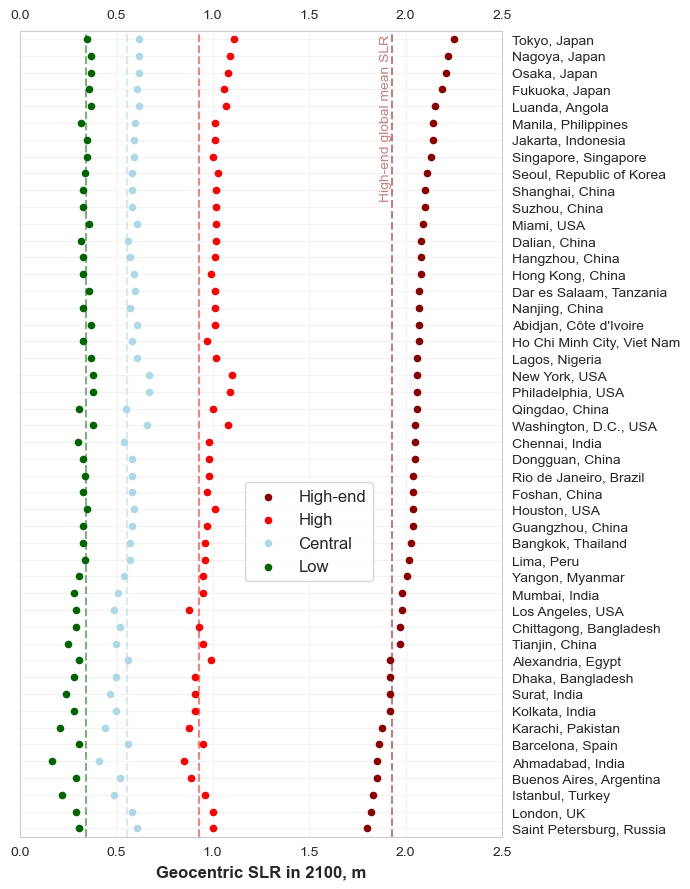

In [13]:
# Plot projections for megacities
fig, ax = d25a.fig_year_2100_megacities()
_ = d25a.name_save_fig(fig, fso='f')

Called fig_fusion_time_series(rsl, gauges, Bangkok)
Reading time_series/rsl_fusion-ssp126_d25a.nc
Reading year_2100/rsl_gauges_cities_2100_d25a.csv
Reading year_2100/rsl_gauges_megacities_2100_d25a.csv
City is Bangkok, location is 444 (FORT_PHRACHULA_CHOMKLAO)
Reading time_series/rsl_low_d25a.nc
Reading time_series/rsl_central_d25a.nc
Reading time_series/rsl_fusion-ssp585_d25a.nc
Reading year_2100/rsl_gauges_cities_2100_d25a.csv
Reading year_2100/rsl_gauges_megacities_2100_d25a.csv
Reading time_series/rsl_high-end_d25a.nc
Reading time_series/rsl_high_d25a.nc
Reading time_series/rsl_central_d25a.nc
Written s03.pdf (0.03 MB)
Written s03.png (0.27 MB)
Called fig_fusion_time_series(novlm, gauges, Bangkok)
Reading time_series/novlm_fusion-ssp126_d25a.nc
Reading year_2100/novlm_gauges_cities_2100_d25a.csv
Reading year_2100/novlm_gauges_megacities_2100_d25a.csv
City is Bangkok, location is 444 (FORT_PHRACHULA_CHOMKLAO)
Reading time_series/novlm_low_d25a.nc
Reading time_series/novlm_central_d2

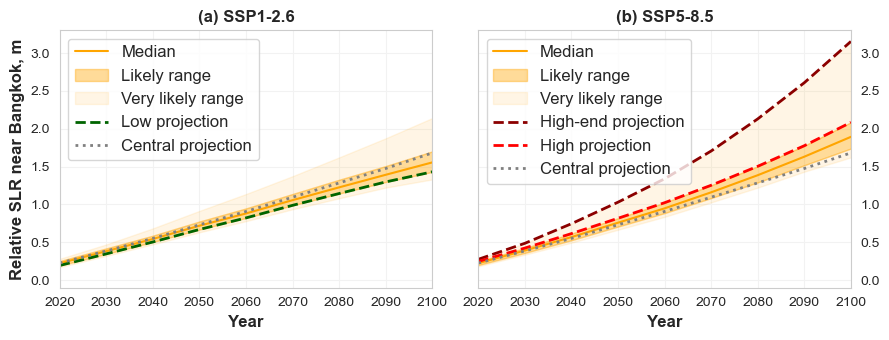

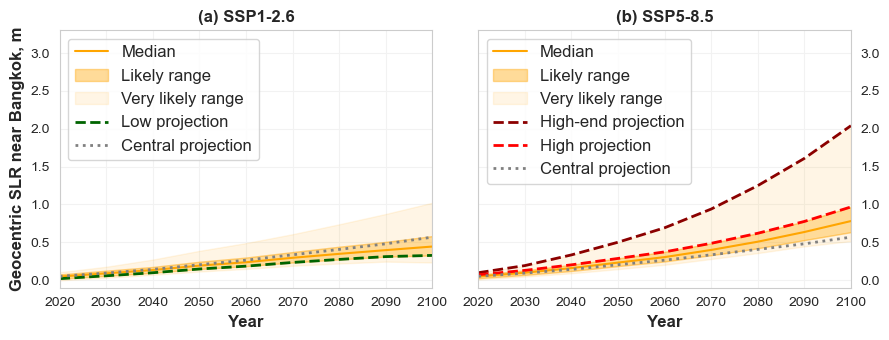

In [14]:
# Plot time series for Bangkok
for slr_str in ['rsl', 'novlm']:
    fig, axs = d25a.fig_fusion_time_series(slr_str=slr_str, gauges_str='gauges', loc_str='Bangkok')
    axs[0].set_ylim([-0.1, 3.3])
    _ = d25a.name_save_fig(fig, fso='s')

In [15]:
# # Plot map for cities in other regions - NO LONGER IMPLEMENTED
# fig, ax = d25a.fig_proj_2100_map(proj_col_str='rsl_high', gauges_cities_megacities='megacities', region='other')
# _ = d25a.name_save_fig(fig, fso='f')

In [16]:
# Identify locations with min and max relative SLR projections
rsl_df = d25a.read_year_2100_df(slr_str='rsl', gauges_str='gauges', cities_str=None)
novlm_df = d25a.read_year_2100_df(slr_str='novlm', gauges_str='gauges', cities_str=None)
for slr_str in ['high-end', 'high', 'central', 'low']:
    for min_max, idx in [('min', rsl_df[slr_str].idxmin()), ('max', rsl_df[slr_str].idxmax())]:
        print(f'{rsl_df["gauge_name"].loc[idx]} ({rsl_df["gauge_country"].loc[idx]}) has {min_max} {slr_str} projection '
              f'of {rsl_df[slr_str].loc[idx]:.1f} m ({novlm_df[slr_str].loc[idx]:.1f} m excluding VLM)')

Reading year_2100/rsl_gauges_2100_d25a.csv
Reading year_2100/novlm_gauges_2100_d25a.csv
SKAGWAY (UNITED STATES) has min high-end projection of -0.1 m (1.8 m excluding VLM)
TOBA (JAPAN) has max high-end projection of 4.0 m (2.2 m excluding VLM)
SKAGWAY (UNITED STATES) has min high projection of -1.1 m (0.8 m excluding VLM)
TOBA (JAPAN) has max high projection of 2.8 m (1.1 m excluding VLM)
KOZU_SIMA (JAPAN) has min central projection of -1.5 m (0.6 m excluding VLM)
TOBA (JAPAN) has max central projection of 2.4 m (0.6 m excluding VLM)
KOZU_SIMA (JAPAN) has min low projection of -1.7 m (0.4 m excluding VLM)
TOBA (JAPAN) has max low projection of 2.1 m (0.4 m excluding VLM)


In [17]:
# Get country-level statistics and show values for countries with at least 4 gauges
country_stats_df = d25a.get_country_stats_df(slr_str='rsl', min_count=4)
country_stats_df.round(decimals=1)

Reading year_2100/rsl_gauges_2100_d25a.csv


,index,gauge_country,country,count,low_med,low_min,low_max,central_med,central_min,central_max,high_med,high_min,high_max,high-end_med,high-end_min,high-end_max
0,27,FINLAND,Finland,24.0,-0.3,-0.6,-0.0,-0.0,-0.3,0.3,0.4,0.1,0.7,1.2,0.9,1.5
1,112,ÅLAND ISLANDS,Åland Islands,4.0,-0.3,-0.3,-0.2,0.0,-0.0,0.1,0.5,0.4,0.5,1.3,1.2,1.3
2,73,NORWAY,Norway,26.0,-0.0,-0.2,0.2,0.3,0.1,0.5,0.7,0.6,0.9,1.4,1.3,1.7
3,96,SWEDEN,Sweden,33.0,0.0,-0.6,0.2,0.3,-0.3,0.6,0.7,0.1,1.0,1.5,0.8,1.8
4,18,CROATIA,Croatia,7.0,0.2,0.2,0.3,0.5,0.4,0.5,0.9,0.8,0.9,1.7,1.7,1.8
5,12,CHILE,Chile,13.0,0.2,0.1,0.4,0.4,0.3,0.6,0.7,0.6,1.0,1.8,1.3,2.0
6,104,UNITED KINGDOM,United Kingdom,43.0,0.3,0.1,0.4,0.5,0.4,0.7,0.9,0.8,1.1,1.8,1.6,1.9
7,9,CANADA,Canada,37.0,0.2,-0.7,0.6,0.4,-0.4,0.9,0.8,0.2,1.3,1.8,1.0,2.3
8,20,DENMARK,Denmark,15.0,0.3,0.2,0.3,0.6,0.4,0.6,1.0,0.9,1.1,1.8,1.7,1.9
9,46,ITALY,Italy,11.0,0.3,0.2,0.4,0.5,0.5,0.6,0.9,0.9,1.0,1.8,1.7,1.9


Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Written fig03.pdf (0.03 MB)
Written fig03.png (0.47 MB)


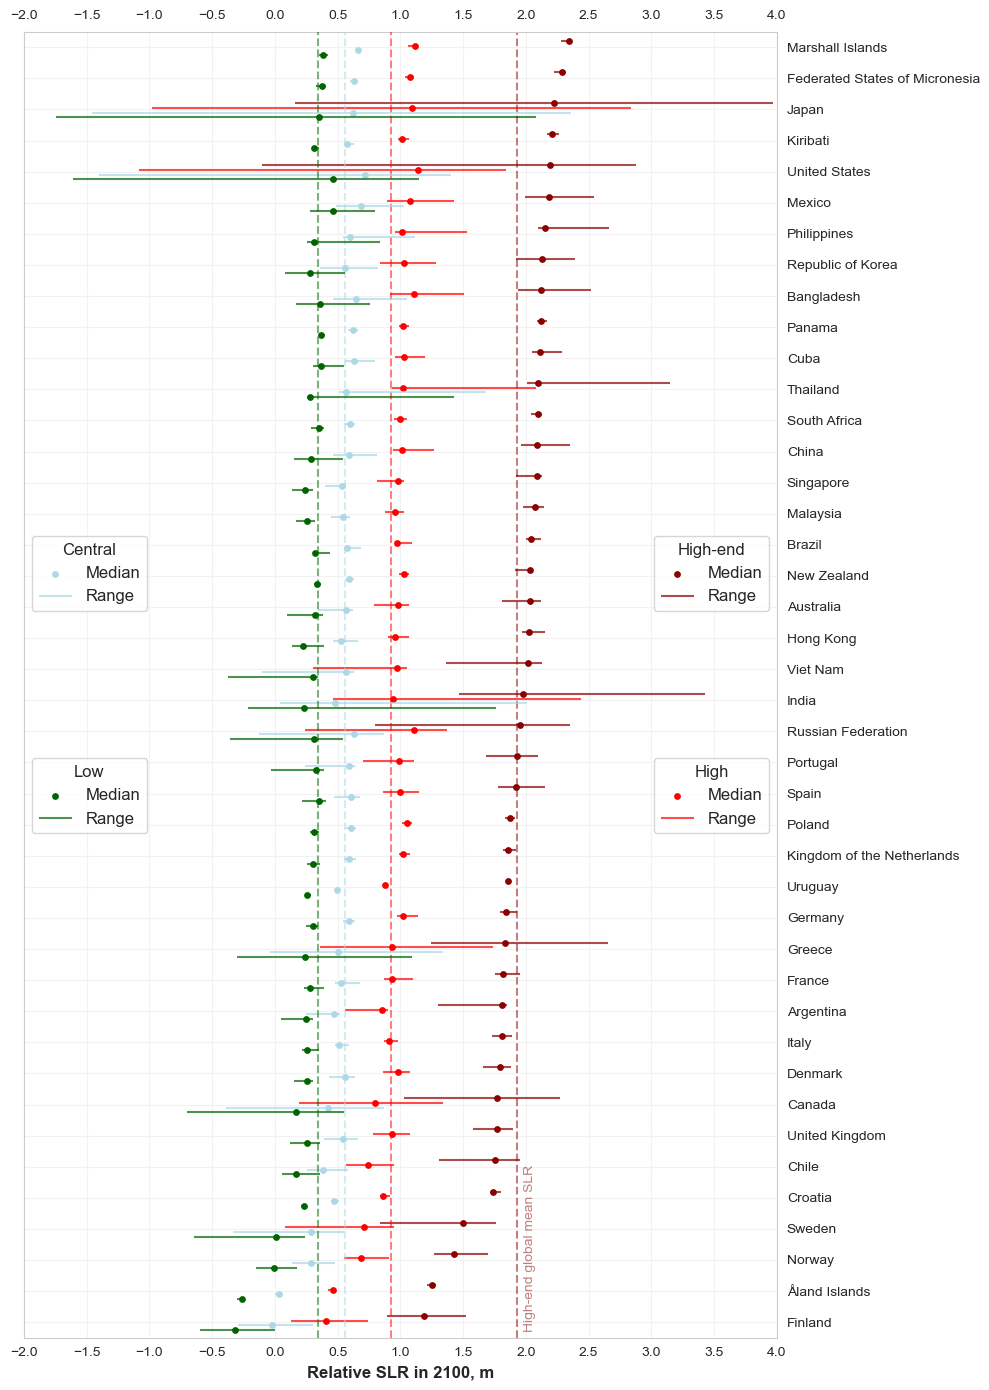

In [18]:
# Plot country-level median, min, and max of high-end, low-end, and central projections for 2100
fig, axs = d25a.fig_country_stats(slr_str='rsl', min_count=4, high_end_only=False)
_ = d25a.name_save_fig(fig, fso='f')

Reading year_2100/rsl_gauges_2100_d25a.csv
Reading year_2100/novlm_gauges_2100_d25a.csv
Written s05.pdf (0.03 MB)
Written s05.png (0.31 MB)


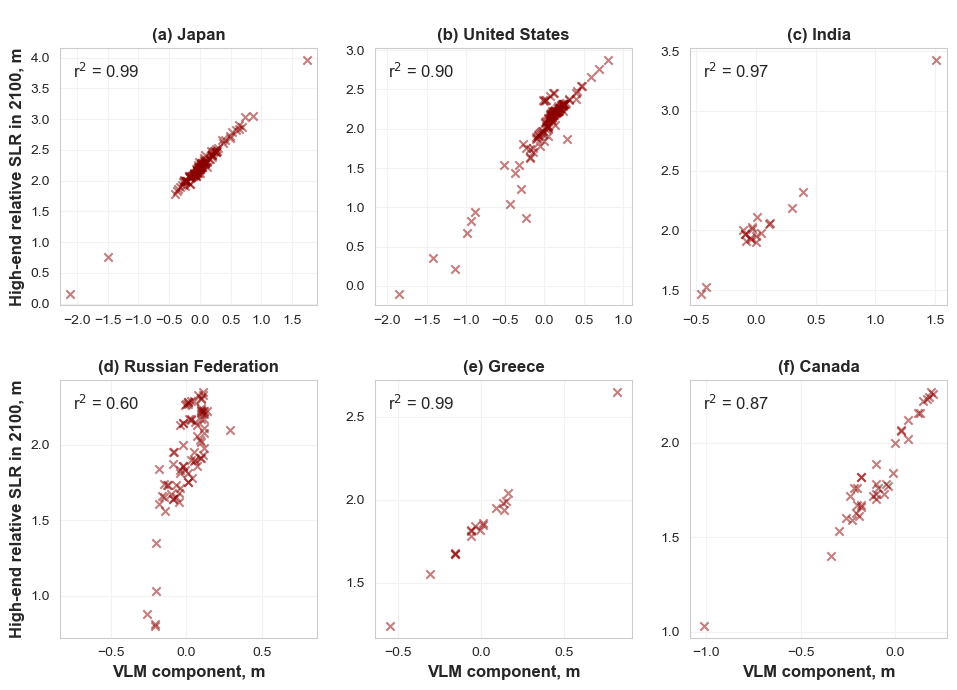

In [19]:
# Plot RSL vs VLM component of high-end projections for countries with the largest RSL ranges.
fig, axs = d25a.fig_rsl_vs_vlm()
_ = d25a.name_save_fig(fig, fso='s')

In [20]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2025-05-08 15:28:45
End:       2025-05-08 15:28:52
Wall time: 7 s
